<a href="https://colab.research.google.com/github/SangeethaKumari/AI-Learning-Projects/blob/main/PYF_Project_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [84]:
!jupyter nbconvert --to html /PYF_Project_Learner_Notebook_Full_Code.ipynb

from google.colab import files
files.download('/PYF_Project_Learner_Notebook_Full_Code.html')


[NbConvertApp] WARNING | pattern '/PYF_Project_Learner_Notebook_Full_Code.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.an

FileNotFoundError: Cannot find file: /PYF_Project_Learner_Notebook_Full_Code.html

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 115.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Write your code here to read the data
data = pd.read_csv('foodhub_order.csv')
df = data.copy()

In [5]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape



(1898, 9)

#### Observations:There are 1898 rows and 9 colums in the given foodhub_order.csv file


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: All the columns have 1898 observations

The day_of_the_week column is being read as a 'object' data type with value either as 'Weekday' or 'Weekend'





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in any column. But there can be rating with value 'Not given'


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [11]:
min = df['food_preparation_time'].min()
avg = df['food_preparation_time'].mean()
max = df['food_preparation_time'].max()
print("Minimum food preparation time",min)
print("Average food preparation time",avg)
print("Maximum food preparation time" , max)

Minimum food preparation time 20
Average food preparation time 27.371970495258168
Maximum food preparation time 35


#### Observations: The values min, average and max gives an idea that there are no outliers. The average falls in between the minimum and maximum values


### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here
count = df['rating'].count()
print("Total number of rating :", count )

count_not_rated = df[df['rating'] == 'Not given'].shape[0]
print("Total number of null rating:", count_not_rated)

Total number of rating : 1898
Total number of null rating: 736


#### Observations:  There are 736 values with no ratings in the csv file


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations on order_id


Text(0, 0.5, 'Number of Customers')

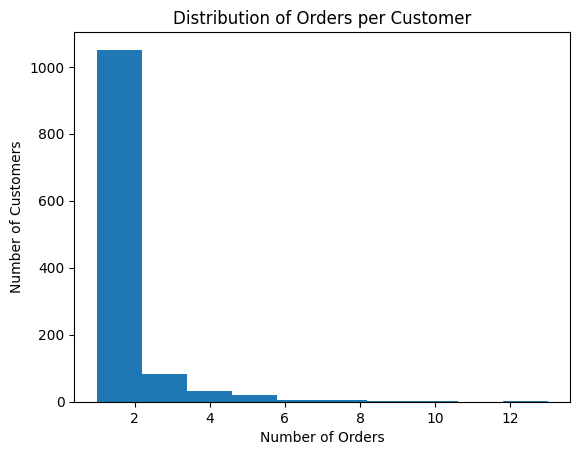

In [30]:
# Write the code here
print("Observations on customer_id")

order_counts = df['customer_id'].value_counts()
order_counts.plot(kind='hist', bins=10)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

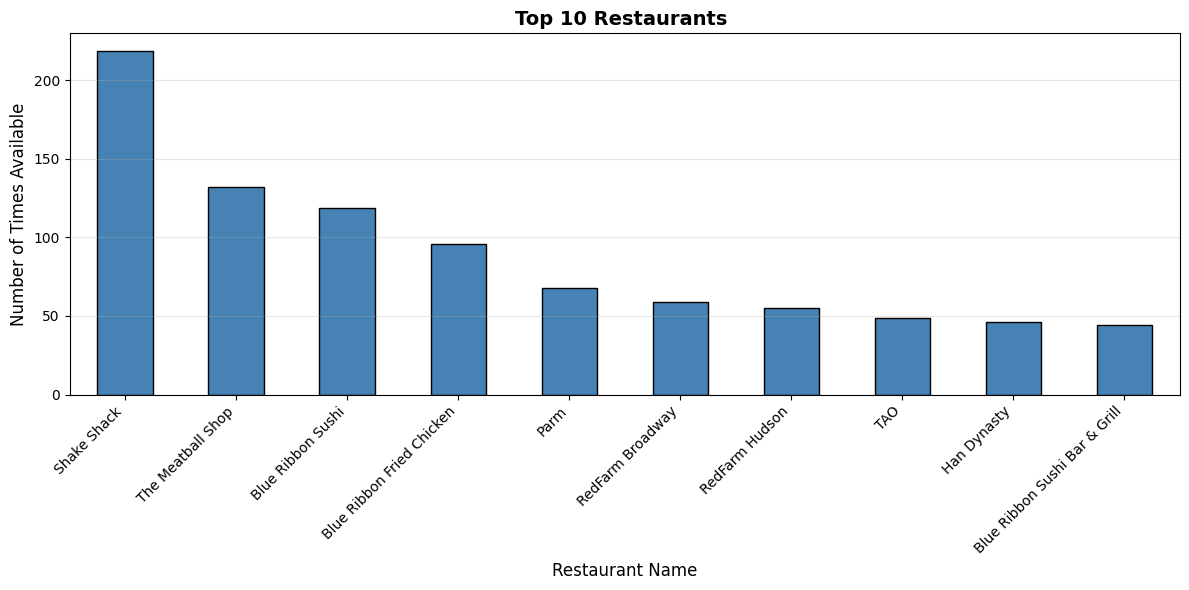

In [28]:
# Write the code here
top_10 = df['restaurant_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Restaurants ', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Number of Times Available', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


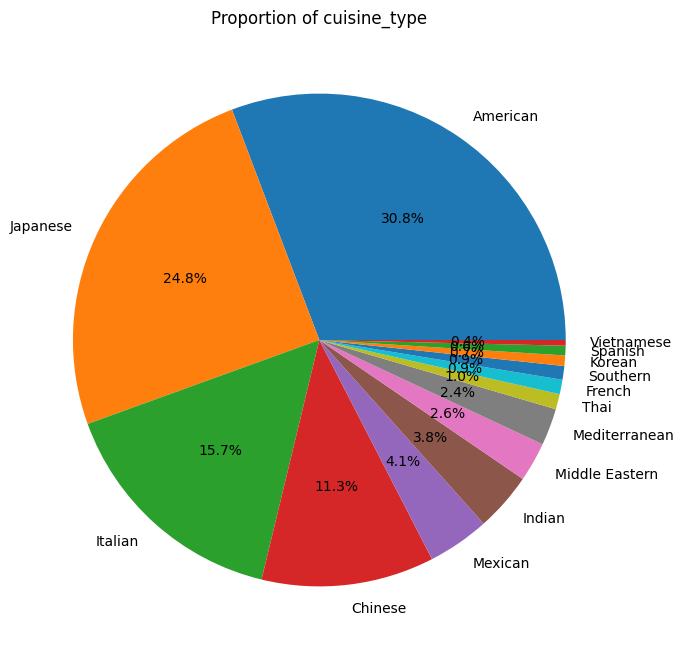

In [32]:
#"Proportion of cuisine_type"
plt.figure(figsize=(8, 8))
df['cuisine_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of cuisine_type')
plt.ylabel('')
plt.show()

Observations on cost_of_the_order


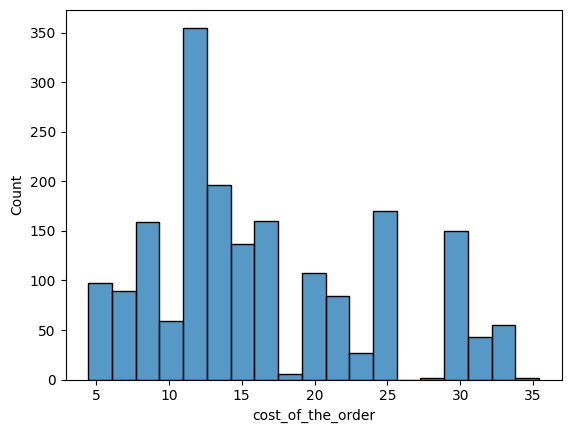

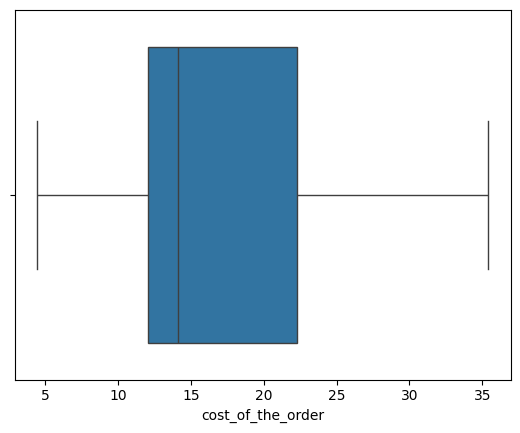

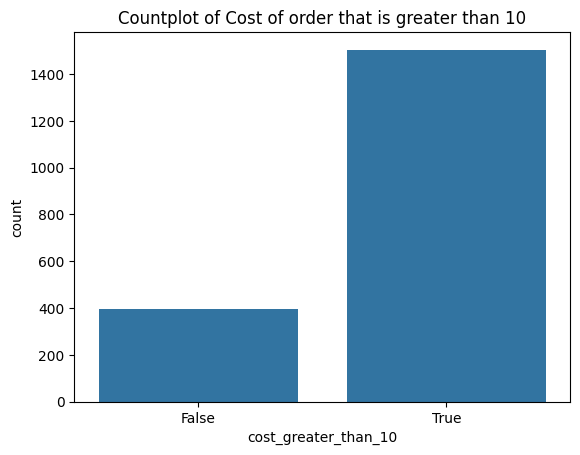

In [18]:
# Write the code here
print("Observations on cost_of_the_order")

sns.histplot(data=df,x='cost_of_the_order')
plt.show()

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

df['cost_greater_than_10'] = df['cost_of_the_order'] > 10
sns.countplot(x='cost_greater_than_10', data=df)
plt.title('Countplot of Cost of order that is greater than 10')
plt.show()



Observations on rating


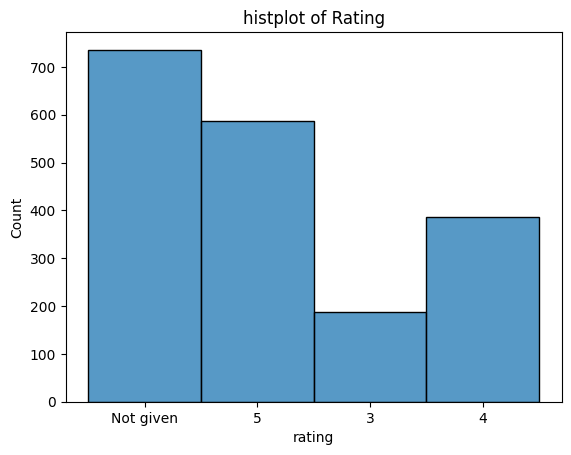

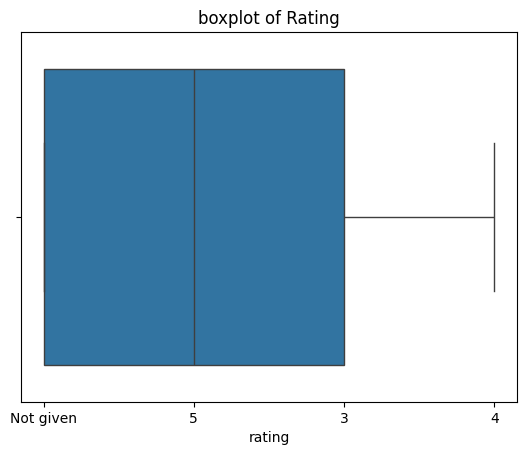

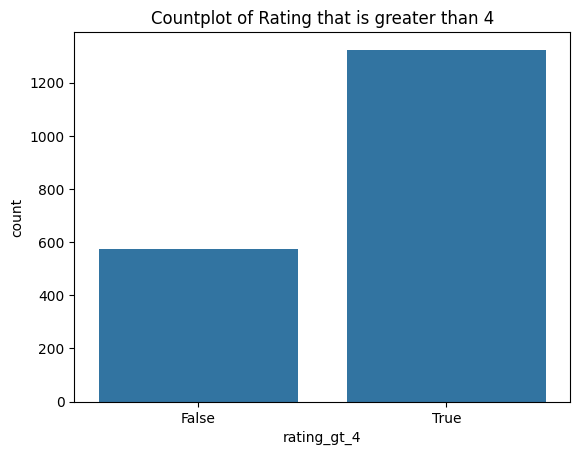

In [21]:
# Write the code here
print("Observations on rating")
sns.histplot(data=df,x='rating')
plt.title('Histplot of Rating')
plt.show()

sns.boxplot(data=df,x='rating')
plt.title('Boxplot of Rating')
plt.show()

df['rating_gt_4'] = df['rating'] > '4'
sns.countplot(x='rating_gt_4', data=df)
plt.title('Countplot of Rating that is greater than 4')
plt.show()

Observations on food_preparation_time


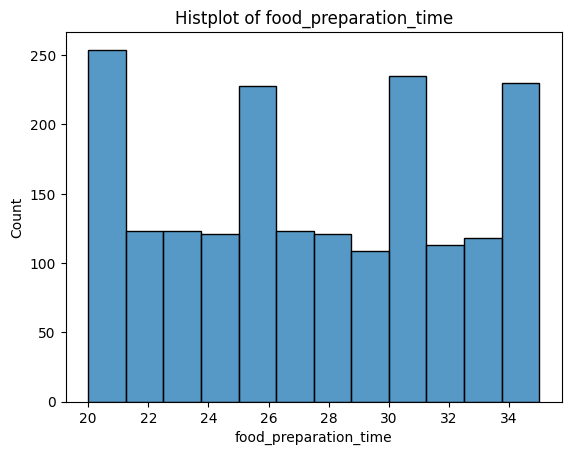

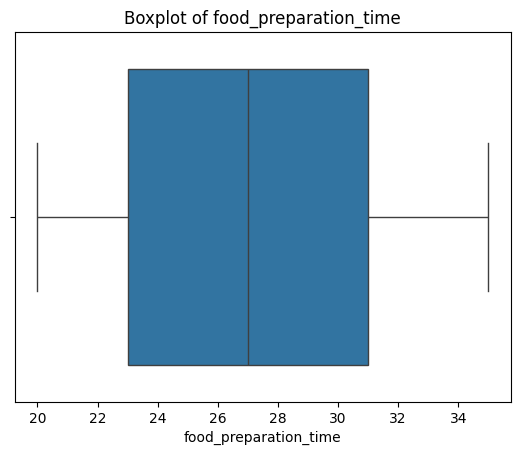

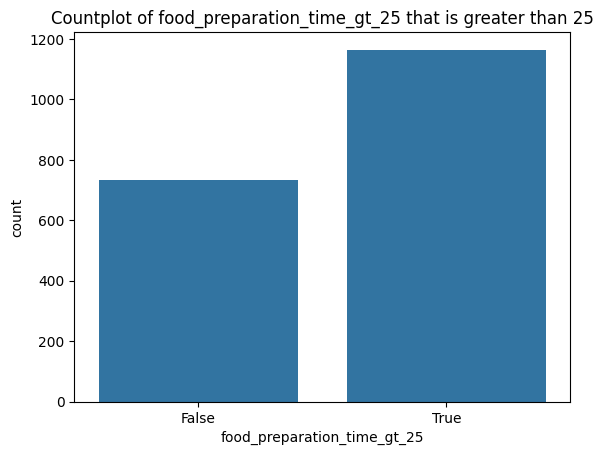

In [26]:
print("Observations on food_preparation_time")
sns.histplot(data=df,x='food_preparation_time')
plt.title('Histplot of food_preparation_time')
plt.show()

sns.boxplot(data=df,x='food_preparation_time')
plt.title('Boxplot of food_preparation_time')
plt.show()

df['food_preparation_time_gt_25'] = df['food_preparation_time'] > 25
sns.countplot(x='food_preparation_time_gt_25', data=df)
plt.title('Countplot of food_preparation_time_gt_25 that is greater than 25')
plt.show()

Observations on delivery_time


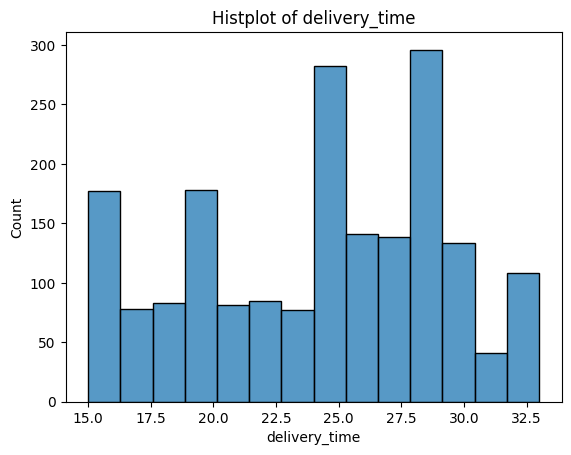

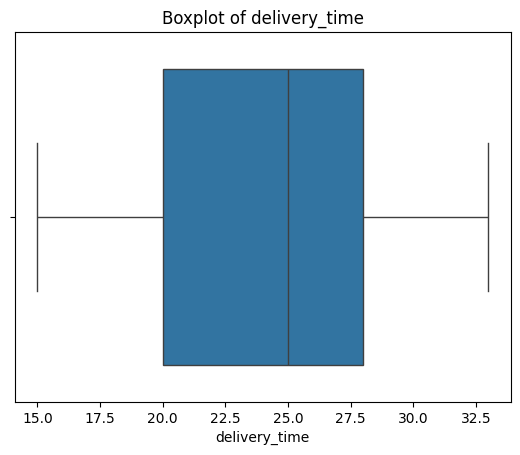

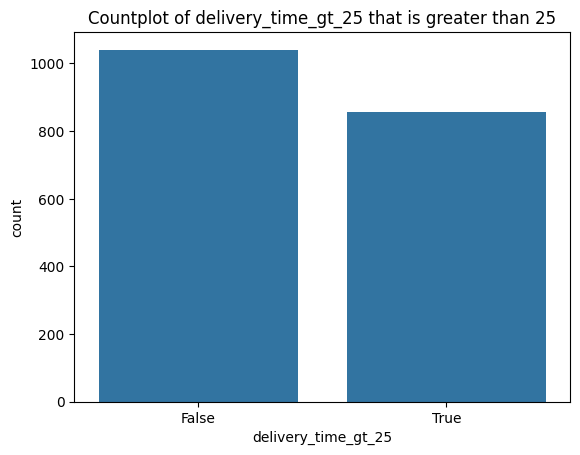

In [28]:
print("Observations on delivery_time")
sns.histplot(data=df,x='delivery_time')
plt.title('Histplot of delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.title('Boxplot of delivery_time')

plt.show()

df['delivery_time_gt_25'] = df['delivery_time'] > 25
sns.countplot(x='delivery_time_gt_25', data=df)
plt.title('Countplot of delivery_time_gt_25 that is greater than 25')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [34]:
# Write the code here
# Write the code here
restaurant_orders = df['restaurant_name'].value_counts()
top_5_restaurants = restaurant_orders.head(5)

print("TOP 5 RESTAURANTS based on orders recieved")
print(top_5_restaurants)

total_orders = restaurant_orders.sum()

percentage_top5 = (top_5_restaurants.sum() / total_orders) * 100
print(f"Top 5 restaurants contribute to {percentage_top5:.2f}% of total orders.")


TOP 5 RESTAURANTS based on orders recieved
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64
Top 5 restaurants contribute to 33.40% of total orders.


#### Observations: Lot of oders are placed frpm three restraurants Shake Shack ,The Meatball Shop and Blue Ribbon Sushi


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [35]:
# Write the code here
week_end = df[df['day_of_the_week'] == 'Weekend']

top_cusine_type_weekend = week_end['cuisine_type'].value_counts()
print("popular cuisine on weekends")
print(top_cusine_type_weekend)

popular cuisine on weekends
cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations: The most popular cusine on weekend are American and Japanese


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [37]:
# Write the code here
from functools import total_ordering
# Write the code here
order_over_20 = df[df['cost_of_the_order'] > 20].shape[0]
print("Orders that cost more than 20 dollars : " ,order_over_20)

total_ordering = df.shape[0]
print("Total number of orders " ,total_ordering)


percent_order_20 = (order_over_20 / total_ordering) *100

print("Percentage of the orders cost more than 20 dollars: ",percent_order_20)

Orders that cost more than 20 dollars :  555
Total number of orders  1898
Percentage of the orders cost more than 20 dollars:  29.24130663856691


#### Observations: Only 29% of orders are greater than 20 dollar implies there is only less orders that is placed with value 20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [38]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time: ", mean_delivery_time)

Mean order delivery time:  24.161749209694417


#### Observations: Looking from the boxplot above, the mean order is not deviated from the min time and the max time which approxiametly are 15 and 32.5


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [39]:
# Write the code here
# Write the code here
top_3_customers = df['customer_id'].value_counts().head(3)
print("Top 3 most frequent customers that placed orders , with the number of orders they placed are : ")
print(top_3_customers)

Top 3 most frequent customers that placed orders , with the number of orders they placed are : 
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: These customers can be given 20% discount vouchers and be included in some referral program with additional discounts leading to  new customers


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   order_id                     1898 non-null   int64  
 1   customer_id                  1898 non-null   int64  
 2   restaurant_name              1898 non-null   object 
 3   cuisine_type                 1898 non-null   object 
 4   cost_of_the_order            1898 non-null   float64
 5   day_of_the_week              1898 non-null   object 
 6   rating                       1898 non-null   object 
 7   food_preparation_time        1898 non-null   int64  
 8   delivery_time                1898 non-null   int64  
 9   cost_greater_than_20         1898 non-null   bool   
 10  cost_greater_than_10         1898 non-null   bool   
 11  rating_gt_4                  1898 non-null   bool   
 12  food_preparation_time_gt_30  1898 non-null   bool   
 13  food_preparation_t

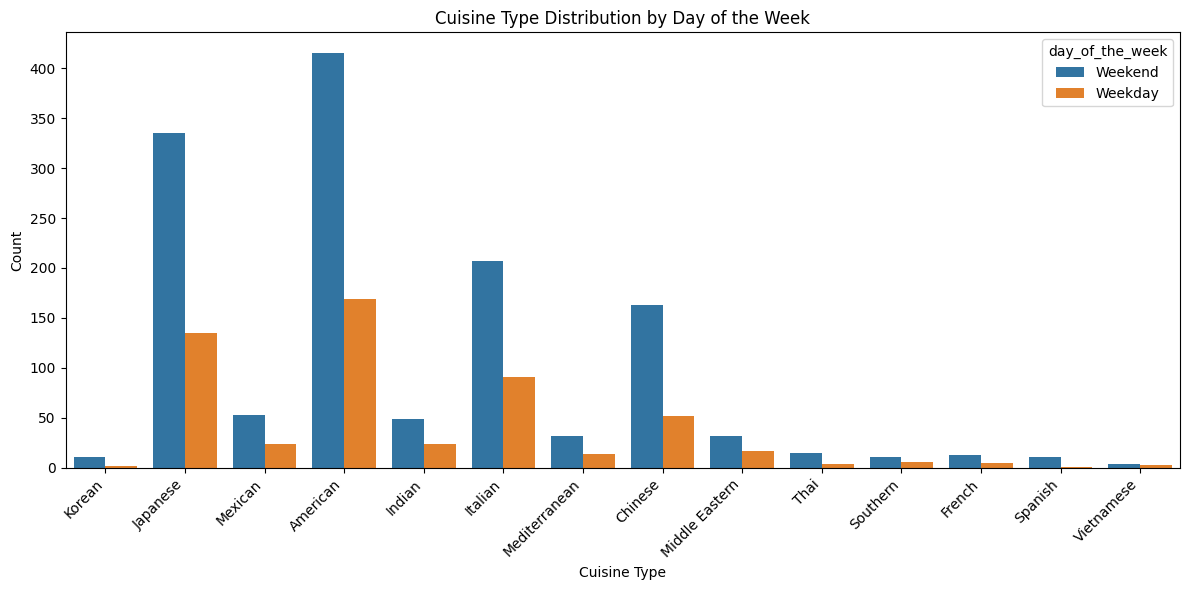

In [40]:
# Write the code here
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.title('Cuisine Type Distribution by Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


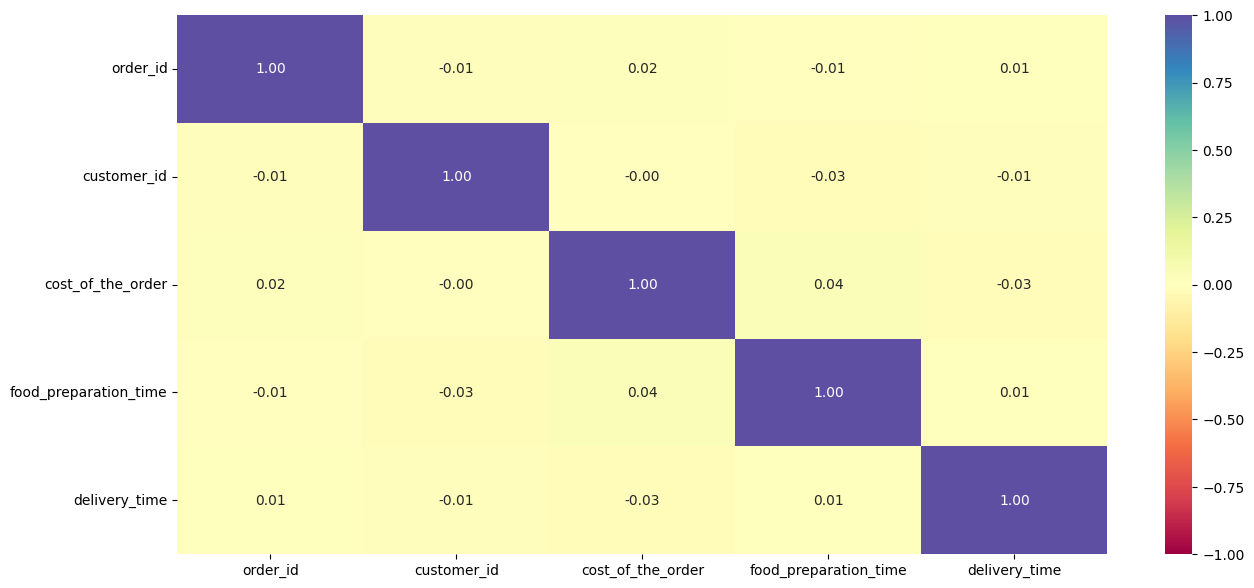

In [42]:
# Selecting only the numerical columns
num_var = data.dtypes[data.dtypes != 'object'].index

# Check for correlation among numerical variables

corr = df[num_var].corr(numeric_only = True)

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

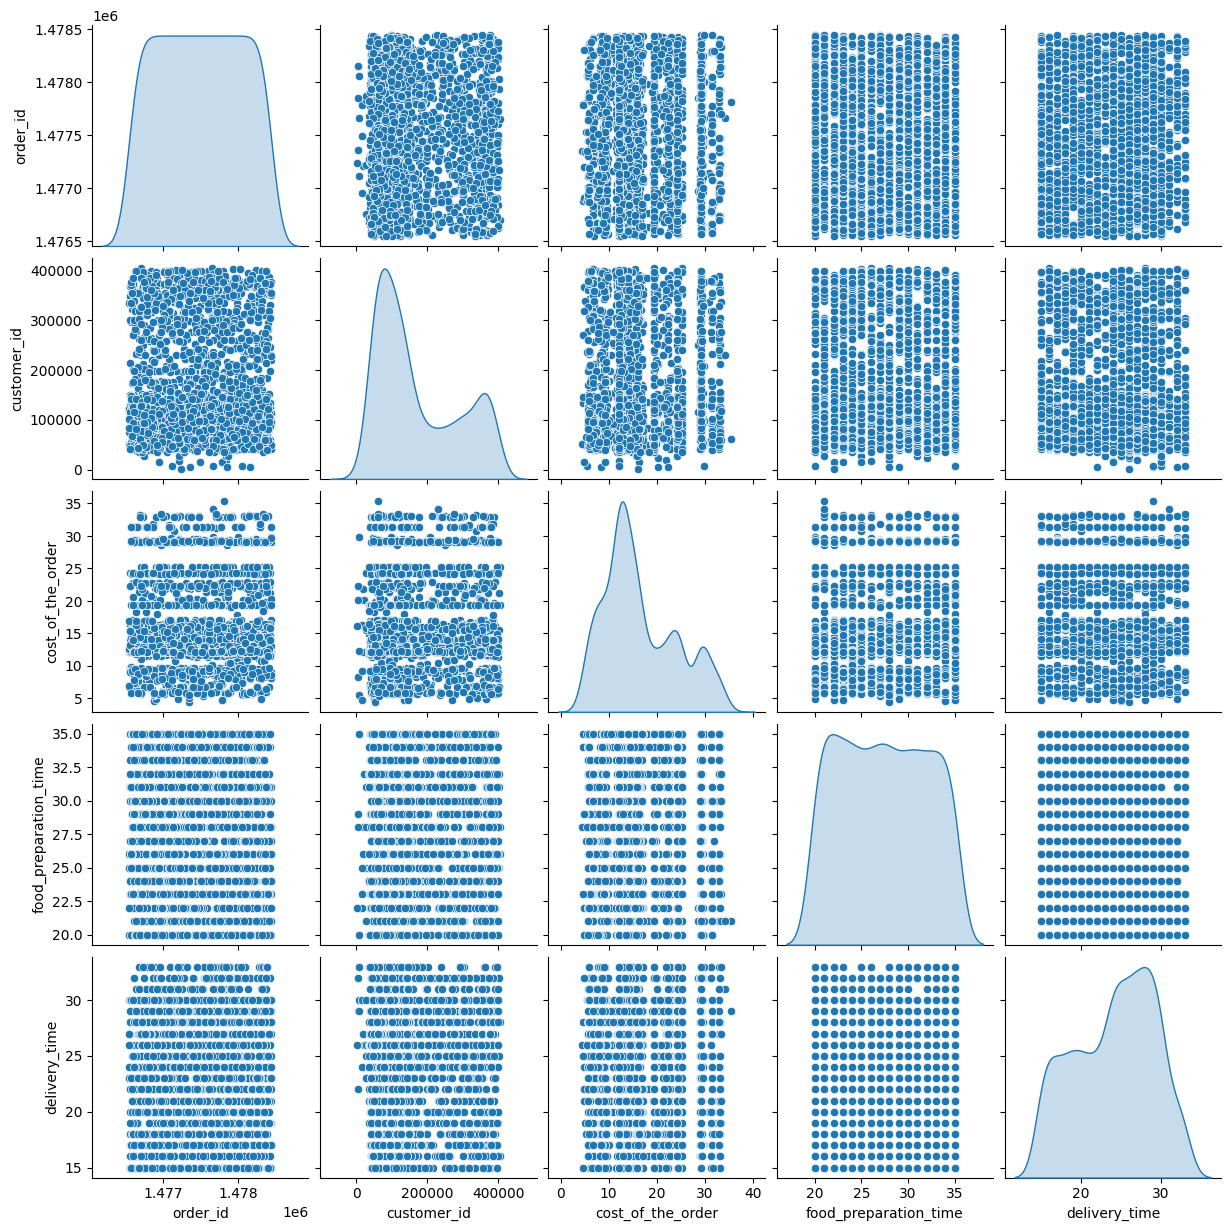

In [43]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

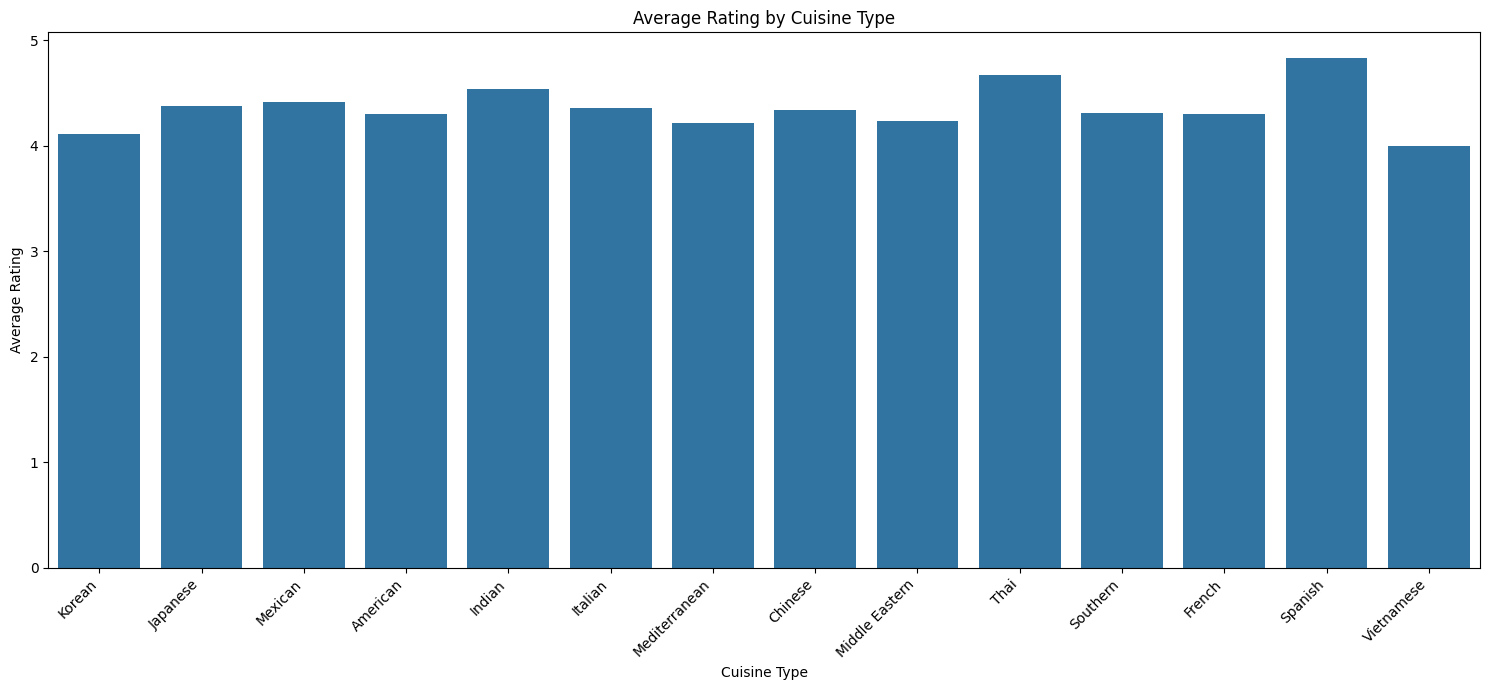

In [53]:

#barplot to visualize the average rating for each cuisine type
df['rating_numeric'] = df['rating'].replace('Not given', np.nan).astype(float)

plt.figure(figsize=(15,7))
sns.barplot(data=df, x="cuisine_type", y="rating_numeric", errorbar=('ci', False))
plt.ylabel('Average Rating')
plt.xlabel('Cuisine Type')
plt.title('Average Rating by Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

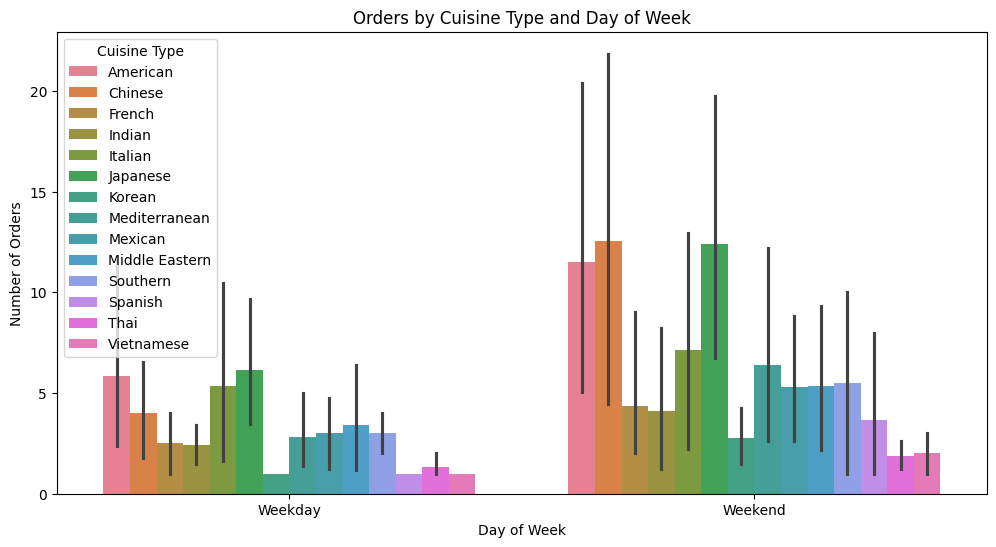

In [57]:
grouped = df.groupby(['cuisine_type', 'restaurant_name', 'day_of_the_week']).size().reset_index(name='order_count')

plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='day_of_the_week', y='order_count', hue='cuisine_type')
plt.title('Orders by Cuisine Type and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.legend(title='Cuisine Type')
plt.show()

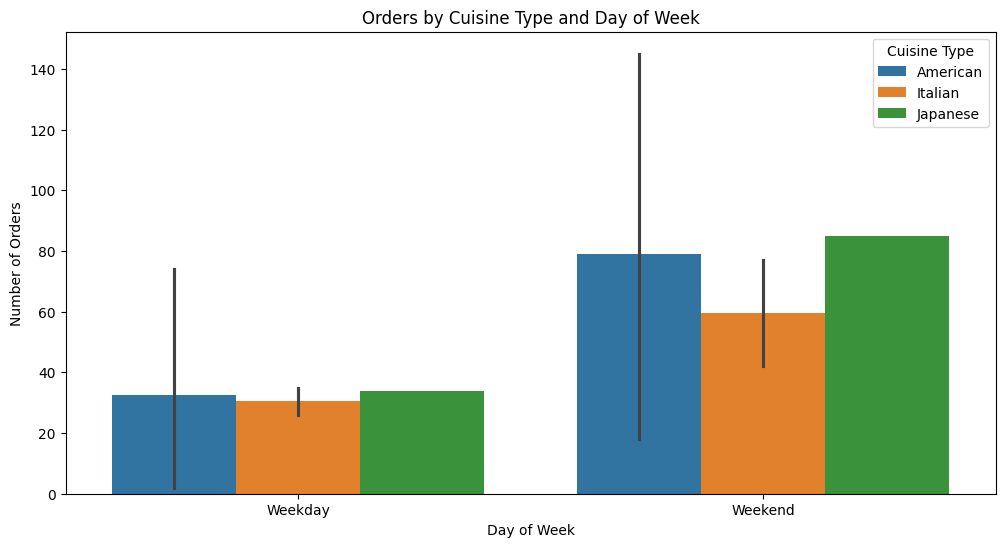

In [58]:
# charting based on top 5 restaurants
top_restaurants = df['restaurant_name'].value_counts().head(5).index
grouped = grouped[grouped['restaurant_name'].isin(top_restaurants)]
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='day_of_the_week', y='order_count', hue='cuisine_type')
plt.title('Orders by Cuisine Type and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.legend(title='Cuisine Type')
plt.show()



Observation : The top three cusine type are American, Japanese and Italian.

                       cost_of_the_order  food_preparation_time  delivery_time  rating_numeric
cost_of_the_order               1.000000               0.041527      -0.029949        0.033983
food_preparation_time           0.041527               1.000000       0.011094       -0.006083
delivery_time                  -0.029949               0.011094       1.000000       -0.009804
rating_numeric                  0.033983              -0.006083      -0.009804        1.000000


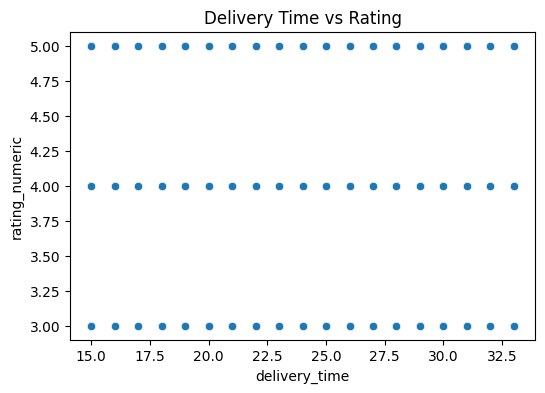

In [61]:
# Correlation table
pd.set_option('display.expand_frame_repr', False)
corr_cols = ['cost_of_the_order','food_preparation_time','delivery_time','rating_numeric']
print(df[corr_cols].corr())

# Scatter: delivery_time vs rating
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='delivery_time', y='rating_numeric')
plt.title('Delivery Time vs Rating')
plt.show()

#### Observations:                                                There’s no strong linear relationship between order cost, preparation time, delivery time, and rating.

This may suggest customer satisfaction (rating) depends more on qualitative factors like food taste, packing of food (hot/cold) , cultrey provided like spoons, knife, sides options provided like the sauce ,  accuracy, or customer service — not just on cost or speed.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [73]:
# Write the code here
pd.set_option('display.expand_frame_repr', False)

restraurant_name_count = df.groupby('restaurant_name')['rating'].count().reset_index()
restraurant_name_count.columns = ['restaurant_name', 'rating_count']


df['rating_numeric'] = df['rating'].replace('Not given', np.nan).astype(float)
restraurant_name_avg_rating = df.groupby('restaurant_name')['rating_numeric'].mean().reset_index()
restraurant_name_avg_rating.columns = ['restaurant_name', 'avg_rating']


merged = pd.merge(restraurant_name_count, restraurant_name_avg_rating, on='restaurant_name')
#print(merged.head())

print("Eligible restaurants with rating count of more than 50 and the average rating should be greater than 4")

eligible_restaurants = merged[
    (merged['rating_count'] > 50) & (merged['avg_rating'] > 4)
]
print(eligible_restaurants)

Eligible restaurants with rating count of more than 50 and the average rating should be greater than 4
               restaurant_name  rating_count  avg_rating
20   Blue Ribbon Fried Chicken            96    4.328125
21           Blue Ribbon Sushi           119    4.219178
109                       Parm            68    4.128205
121           RedFarm Broadway            59    4.243902
122             RedFarm Hudson            55    4.176471
136                Shake Shack           219    4.278195
153          The Meatball Shop           132    4.511905


#### Observations: THe shake Shanck has the highest rating count followed by The mestball shop. These restaurants meet both popularity (high rating count) and quality (high average rating) criteria.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [79]:
# Write the code here
charges_criteria = [
    df['cost_of_the_order'] > 20,
    (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20),
    df['cost_of_the_order'] <= 5
]
# Corresponding percentages
percentages = [0.25, 0.15, 0.0]

# Calculate revenue per order
df['company_revenue'] = np.select(charges_criteria, percentages, default=0) * df['cost_of_the_order']

print(df[['order_id','cost_of_the_order','company_revenue']].head())

total_revenue = df['company_revenue'].sum()
print(f"Net revenue generated by the company: ${total_revenue:,.2f}")


   order_id  cost_of_the_order  company_revenue
0   1477147              30.75           7.6875
1   1477685              12.08           1.8120
2   1477070              12.23           1.8345
3   1477334              29.20           7.3000
4   1478249              11.59           1.7385
Net revenue generated by the company: $6,166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [80]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

orders_over_60_minutes = df[df['total_time'] > 60].shape[0]
total_orders = df.shape[0]

percentage_over_60 = (orders_over_60_minutes / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations: Not much orders takes more than an hour to deliver once the order is pplaced. There is no time of the day provided to find other affecing factors


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [81]:
# Write the code here

# Group by day_of_the_week
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
mean_delivery.rename(columns={'delivery_time': 'mean_delivery_time'}, inplace=True)
print(mean_delivery)


  day_of_the_week  mean_delivery_time
0         Weekday           28.340037
1         Weekend           22.470022


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. The top 5 restaurants contribute a significant portion of total orders, indicating concentrated demand.

2. Most orders are completed within 60 minutes (≈89.5%), which is good time when it included the food preparation time and delivery time. The customeres can place their food orders one hour before the lunch time to get the food delivered at the lunch break. They dont have to plan way ahead.

3. Delivery times are shorter on weekends (22.47 min) compared to weekdays (28.34 min). This can imply less travel on weekends closer to the office and restraunts and can also be more customers are out closer to the restraunts to have in person experience .

4. Certain cuisines orders more on weekend than weekdays.

### Recommendations:
1. Check with the top 5 restraunts can be handle more orders but still have less delivery time.
2. Analyze weekday delivery delays (28.34 min vs 22.47 min on weekends) This can imply less travel on weekends closer to the office and restraunts and can also be more customers are out closer to the restraunts to have in person experience .

3. Collect more data on the rating sub categories instead of just rating like food, delivery cost, cuisine type.                        

4. How can net revenue be increase. - does increasing or decreasing the charges affect the net revenue.

5. What are other restraunts can be added for promotions to increase customer order placement.




---